<a href="https://colab.research.google.com/github/Mishra-0709/Createch-2025/blob/main/Environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 0.99999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33159
           1       1.00      1.00      1.00     47878

    accuracy                           1.00     81037
   macro avg       1.00      1.00      1.00     81037
weighted avg       1.00      1.00      1.00     81037



<Figure size 1200x600 with 0 Axes>

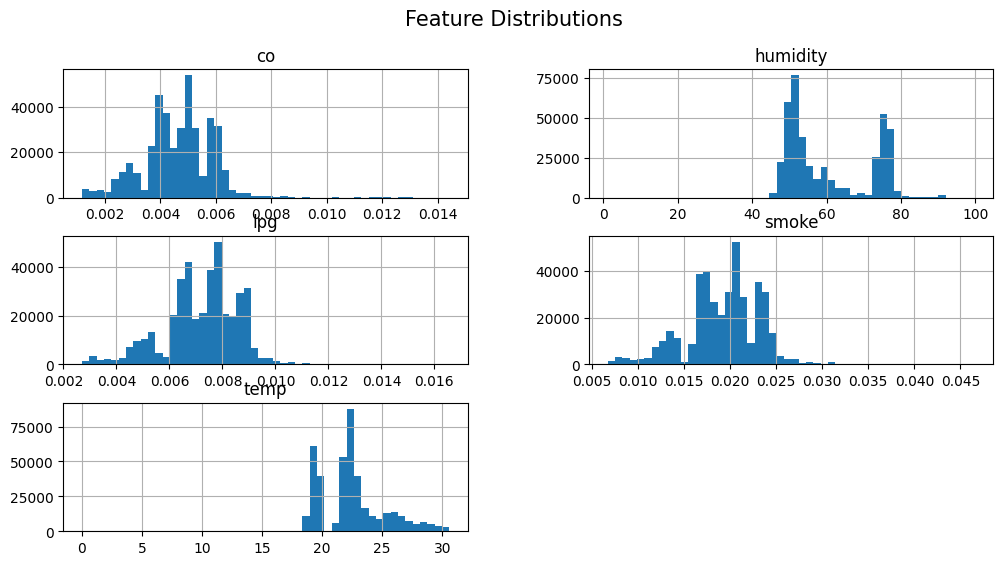

<ipython-input-9-dbfe1b42d288>:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




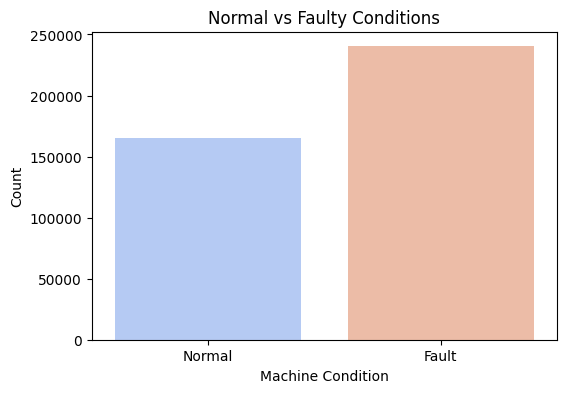

<ipython-input-9-dbfe1b42d288>:61: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




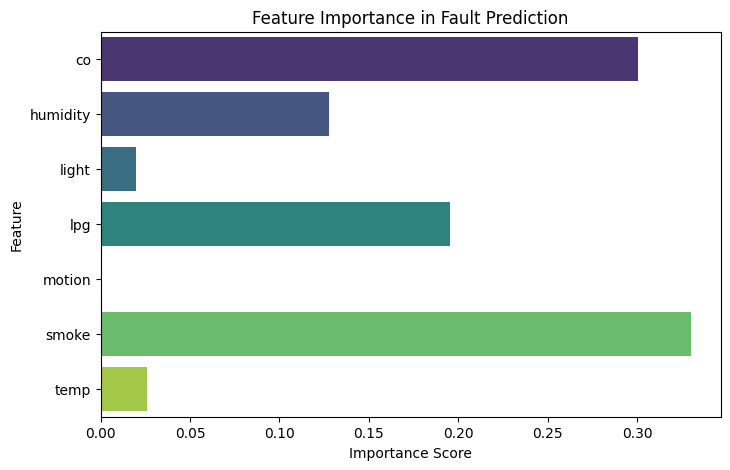

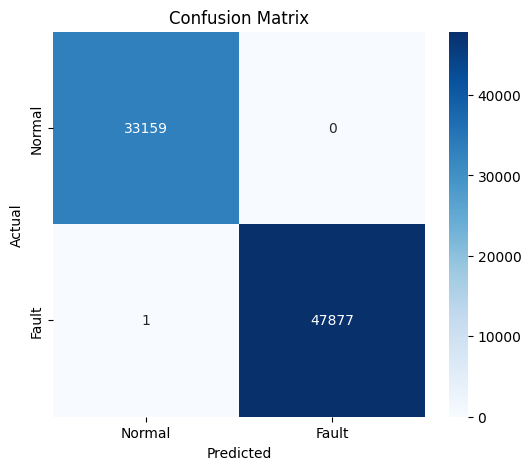

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "/content/iot_telemetry_data.csv"
df = pd.read_csv(file_path)

# Define fault conditions (1: Undesirable, 0: Normal)
df['fault'] = ((df['co'] > 0.005) | (df['lpg'] > 0.007) | (df['smoke'] > 0.02) |
               (df['humidity'] > 80) | (df['humidity'] < 20) |
               (df['temp'] > 50) | (df['temp'] < 0)).astype(int)

# Selecting features and target variable
features = ['co', 'humidity', 'light', 'lpg', 'motion', 'smoke', 'temp']
X = df[features]
y = df['fault']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.5f}")
print("Classification Report:\n", report)

# ------------------ PLOTTING ------------------

# 1. Feature Distributions
plt.figure(figsize=(12, 6))
df[features].hist(bins=50, figsize=(12, 6))
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

# 2. Fault Condition Count
plt.figure(figsize=(6, 4))
sns.countplot(x=df['fault'], palette='coolwarm')
plt.xticks([0, 1], ['Normal', 'Fault'])
plt.xlabel("Machine Condition")
plt.ylabel("Count")
plt.title("Normal vs Faulty Conditions")
plt.show()

# 3. Feature Importance
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Fault Prediction")
plt.show()

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fault'], yticklabels=['Normal', 'Fault'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
